# LIST 2

Model fitting and data analysis exercises.

> For more information on the dataset and the underlying study, please visit [this link](http://www.scielo.br/pdf/abc/2015nahead/0066-782X-abc-20150089.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy as sp
import scipy.stats as stats

%matplotlib inline

In [2]:
df = pd.read_csv("../data/medical-data.csv",sep=";").astype(float)
df.columns = ['idade','peso','carga_final','vo2_max']
df.describe()

,idade,peso,carga_final,vo2_max
count,1172.000000,1172.000000,1172.000000,1172.000000
mean,53.290956,85.925776,172.271502,140.631503
std,14.746297,14.799113,70.093124,1973.597226
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.799827
50%,54.000000,83.700000,170.000000,28.387223
75%,64.000000,94.450000,220.000000,36.050892
max,91.000000,178.900000,432.000000,45375.000000


> Out of all records, 3 are in the tens of thousands while all others are no larger than 80. I'll therefore remove those as they are likely noise.

In [3]:
df = df[df['vo2_max'] < 10000]
df.describe()

,idade,peso,carga_final,vo2_max
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,53.342466,85.858399,172.168836,29.383665
std,14.733014,14.654875,70.152221,10.500240
min,18.000000,45.300000,30.000000,5.846847
25%,42.000000,76.100000,120.000000,21.797423
50%,54.000000,83.700000,170.000000,28.326660
75%,64.000000,94.400000,220.000000,35.841380
max,91.000000,178.900000,432.000000,73.333333


> A few plots just to get a feeling for our dataset

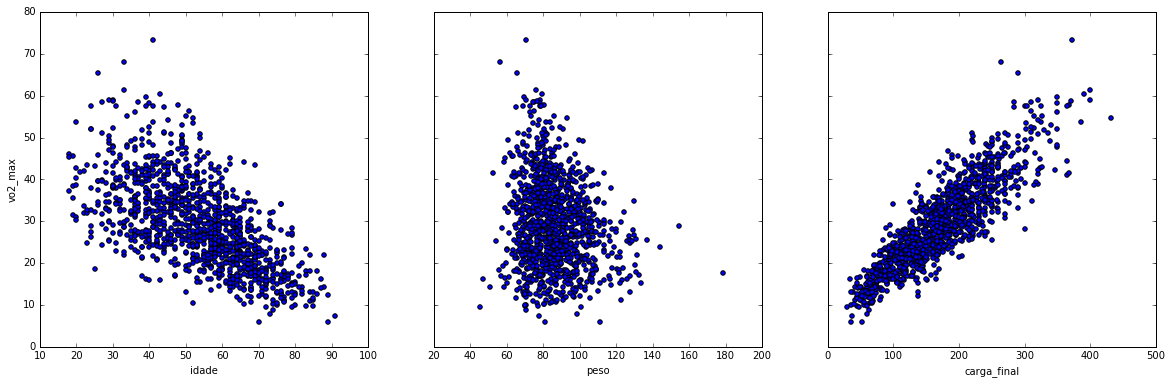

In [4]:
fig, axs = plt.subplots(1,3, sharey=True)
df.plot(kind='scatter',x='idade',y='vo2_max',ax=axs[0],figsize=(20,6))
df.plot(kind='scatter',x='peso',y='vo2_max',ax=axs[1])
df.plot(kind='scatter',x='carga_final',y='vo2_max',ax=axs[2])

# QUESTION 1

## ITEM 1.1

> Polynomials of different degrees fitted using least-squares, trying to predict y (`vo2_max`) in terms of x (`carga_final`).

> The parameters for the curves are the number of degrees in the polynomial and sigma, the standard deviation of the error, which is assumed gaussian

/home/felipe/statistical-learning/venv/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


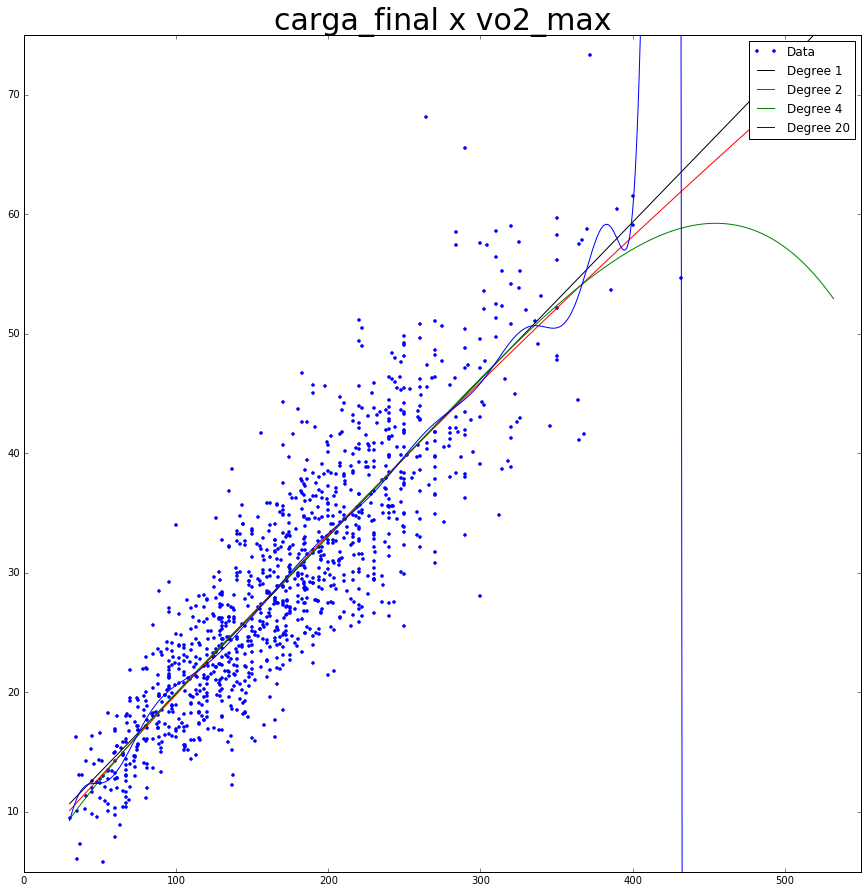

In [5]:
x = df['carga_final'].values
y = df['vo2_max'].values

plt.clf()

# degree 1
params_1 = np.polyfit(x,y,deg=1)

# degree 2
params_2 = np.polyfit(x,y,deg=2)

# degree 4
params_4 = np.polyfit(x,y,deg=4)

# degree 20
params_20 = np.polyfit(x,y,deg=20)

p1 = np.poly1d(params_1) 
p2 = np.poly1d(params_2)
p4 = np.poly1d(params_4)
p20 = np.poly1d(params_20)
plt.figure(figsize=(15,15))

# error itself is a gaussian RV
def gen_error(mu,sigma,domain):
    return(np.random.normal(mu,sigma,len(domain)))

# this is the domain dor the predictions
xs = np.linspace(x.min(),x.max()+100,len(x))

plt.title("carga_final x vo2_max",{'fontsize':30})
plt.plot(x,y,'.',label="Data")
plt.plot(xs,p1(xs),'k-', label='Degree 1')
plt.plot(xs,p2(xs),'r-', label='Degree 2')
plt.plot(xs,p4(xs),'g-', label='Degree 4')
plt.plot(xs,p20(xs),'b-', label='Degree 20')
plt.ylim(5,75)
plt.xlim(0,550)
_ = plt.legend()

**Calculating the Negative Log Likelihood**

The negative log likelihood (NLL) of the parameters are as follows:

$$NLL(\theta) = \sum_{i=1}^{N} \log{\Pr(y_i\vert x_i,\theta)} $$

So, in other words, for each observed point $y_i$ in the data set, I can imagine there is a gaussian distribution with mean $\widehat{y_i}$ (the approximation of $y_i$ obtained by fitting the polynomial) and standard deviation $\sigma$. 

So we can calculate the likelihood that the observed point is explained by our model plus or minus a given error.

In [6]:
xs = np.linspace(x.min(),x.max(),len(x))

SIGMA = 1000

# DEGREE 1

# degree 1, sigma 1000
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 100

# degree 1, sigma 100
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 10

# degree 1, sigma 10
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

# DEGREE 2

SIGMA = 1000

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 100

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 10

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

# DEGREE 4

SIGMA = 1000

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 100

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 10

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

# DEGREE 20

SIGMA = 1000

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 100

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 10

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))


Degree 1: 
 w     = [ 0.13146104  6.75017039] 
 SIGMA = 1000
 NLL   = 9141.92 

Degree 1: 
 w     = [ 0.13146104  6.75017039] 
 SIGMA = 100
 NLL   = 6486.70 

Degree 1: 
 w     = [ 0.13146104  6.75017039] 
 SIGMA = 10
 NLL   = 7216.35 

Degree 2:  SIGMA = 1000, NLL   = 9141.91 

Degree 2:  SIGMA = 100, NLL   = 6485.70 

Degree 2:  SIGMA = 10, NLL   = 7116.97 

Degree 4:  SIGMA = 1000, NLL   = 9141.91 

Degree 4:  SIGMA = 100, NLL   = 6485.04 

Degree 4:  SIGMA = 10, NLL   = 7050.75 

Degree 2:  SIGMA = 1000, NLL   = 9143.29 

Degree 20:  SIGMA = 100, NLL   = 6623.15 

Degree 20:  SIGMA = 10, NLL   = 20861.81 



## ITEM 1.2

> Similarly, here we have polynomials of different degrees fitted using least-squares, but now trying to predict y (`vo2_max`) in terms of x (`idade`)

/home/felipe/statistical-learning/venv/lib/python3.4/site-packages/numpy/lib/polynomial.py:594: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


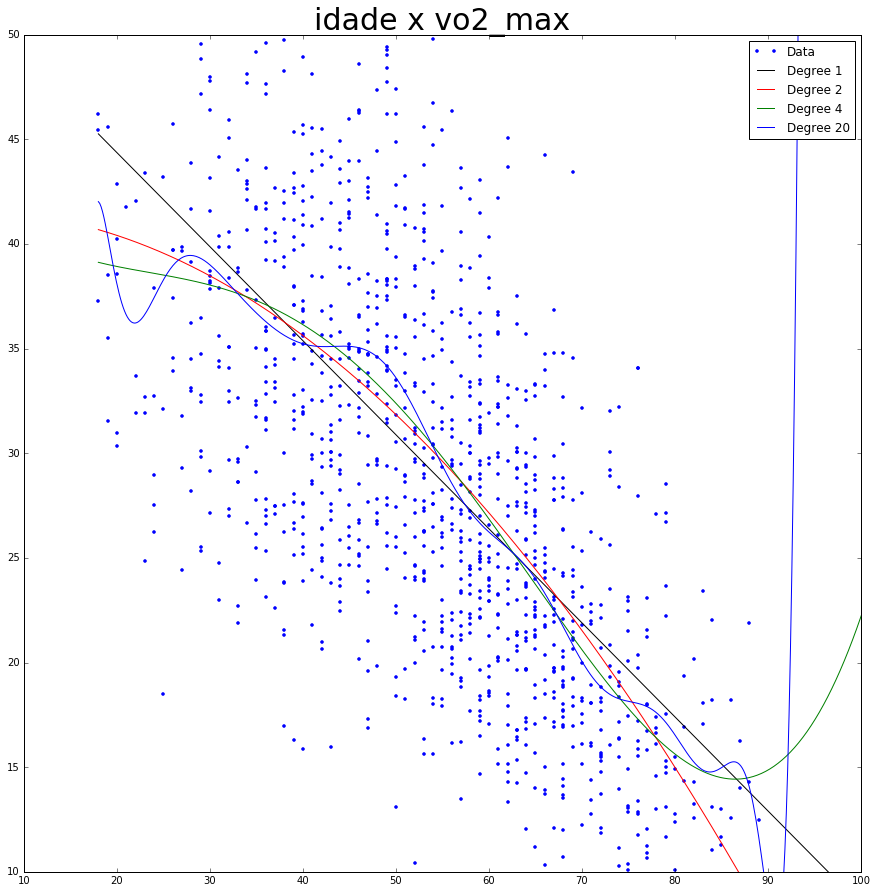

In [7]:
x = df['idade'].values
y = df['vo2_max'].values

plt.clf()

params_1 = np.polyfit(x,y,deg=1)
params_2 = np.polyfit(x,y,deg=2)
params_4 = np.polyfit(x,y,deg=4)
params_20 = np.polyfit(x,y,deg=20)

p1 = np.poly1d(params_1) 
p2 = np.poly1d(params_2)
p4 = np.poly1d(params_4)
p20 = np.poly1d(params_20)
plt.figure(figsize=(15,15))

xs = np.linspace(x.min(),x.max()+100,len(x))

plt.title("idade x vo2_max",{'fontsize':30})
plt.plot(x,y,'.',label="Data")

plt.plot(xs,p1(xs),'k-', label='Degree 1')
plt.plot(xs,p2(xs),'r-', label='Degree 2')
plt.plot(xs,p4(xs),'g-', label='Degree 4')
plt.plot(xs,p20(xs),'b-', label='Degree 20')
plt.ylim(10,50)
plt.xlim(10,100)
_ = plt.legend()

> In order to calculate the Negative Log Likelihood (NLL), we'll follow the same approach as in Item 1.1

In [8]:
xs = np.linspace(x.min(),x.max(),len(x))

SIGMA = 1000

# DEGREE 1

# degree 1, sigma 1000
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 100

# degree 1, sigma 100
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

SIGMA = 10

# degree 1, sigma 10
nll_1 = - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

print("Degree 1: \n w     = {0} \n SIGMA = {1}\n NLL   = {2:.2f} \n".format(
        params_1,
        SIGMA,
        nll_1))

# DEGREE 2

SIGMA = 1000

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 100

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

SIGMA = 10

nll_2 = - np.sum(stats.norm.logpdf(y,loc=p2(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_2))

# DEGREE 4

SIGMA = 1000

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 100

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

SIGMA = 10

nll_4 = - np.sum(stats.norm.logpdf(y,loc=p4(xs),scale=SIGMA))
print("Degree 4:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_4))

# DEGREE 20

SIGMA = 1000

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 2:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 100

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))

SIGMA = 10

nll_20 = - np.sum(stats.norm.logpdf(y,loc=p20(xs),scale=SIGMA))
print("Degree 20:  SIGMA = {0}, NLL   = {1:.2f} \n".format(SIGMA,nll_20))


Degree 1: 
 w     = [ -0.44938877  53.35517048] 
 SIGMA = 1000
 NLL   = 9141.63 

Degree 1: 
 w     = [ -0.44938877  53.35517048] 
 SIGMA = 100
 NLL   = 6457.03 

Degree 1: 
 w     = [ -0.44938877  53.35517048] 
 SIGMA = 10
 NLL   = 4249.81 

Degree 2:  SIGMA = 1000, NLL   = 9141.63 

Degree 2:  SIGMA = 100, NLL   = 6457.65 

Degree 2:  SIGMA = 10, NLL   = 4311.49 

Degree 4:  SIGMA = 1000, NLL   = 9141.63 

Degree 4:  SIGMA = 100, NLL   = 6457.26 

Degree 4:  SIGMA = 10, NLL   = 4272.93 

Degree 2:  SIGMA = 1000, NLL   = 9141.63 

Degree 20:  SIGMA = 100, NLL   = 6457.38 

Degree 20:  SIGMA = 10, NLL   = 4284.48 



# QUESTION 2

> For this question, we will attempt to create a model based off variables `idade` (x) and `carga_final` (y), in order to try and approximate the values for the target variable `vo2_max` (z).

In [9]:
from mpl_toolkits.mplot3d import Axes3D

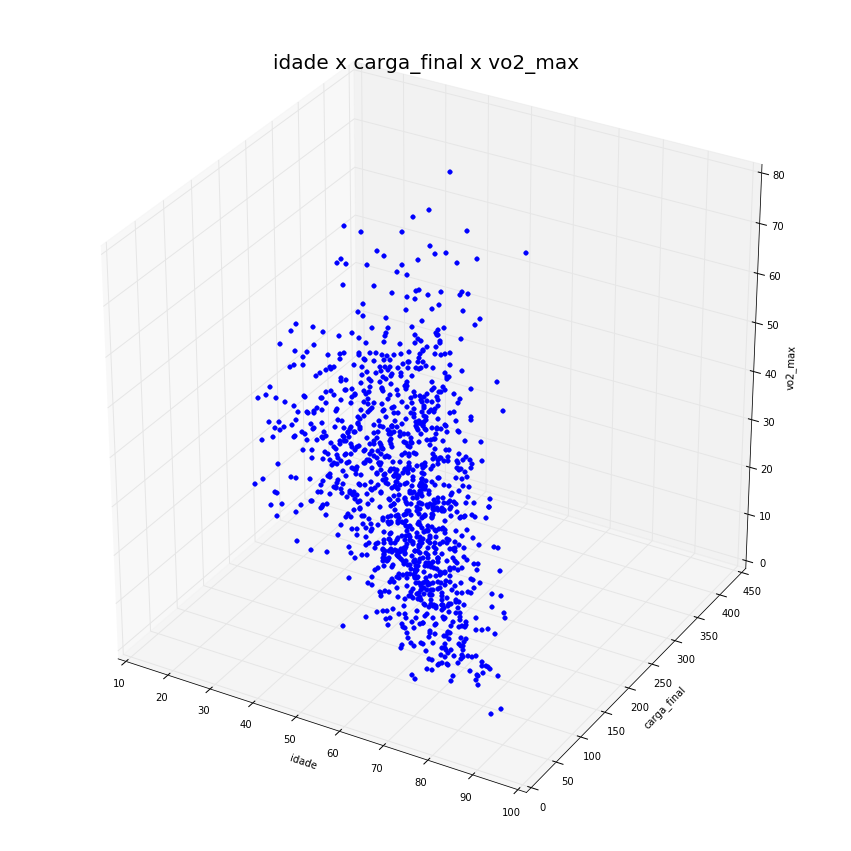

In [10]:
# our data
x = df["idade"]
y = df["carga_final"]
z = df["vo2_max"]

# plotting the points as a scatter plot
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.plot(x,y,z,'.',ms=9.0, label="Data")
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
plt.title("idade x carga_final x vo2_max",{'fontsize':20})

> As an example, let's use a simple 1-degree surface (a plane) to try and fit the data

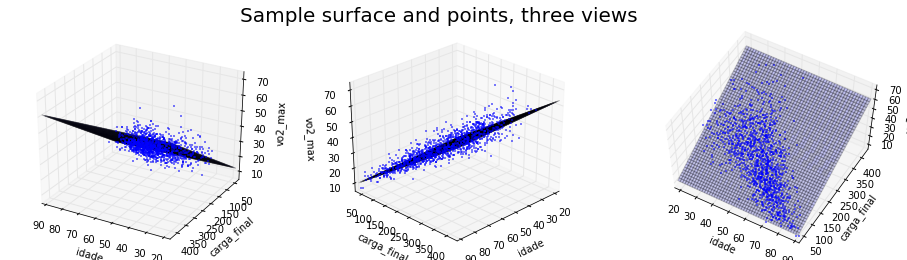

In [11]:
from scipy.optimize import curve_fit
from scipy.linalg import lstsq
   
plt.clf()

# we will use these as a 'mesh' to plot z-values
domain_x = np.linspace(x.min(),x.max(),50)
domain_y = np.linspace(y.min(),y.max(),50)

# the center of our 2-d domain
zero_x = (x.max()+x.min()) / 2
zero_y = (y.max()+y.min()) / 2

X,Y = np.meshgrid(domain_x, domain_y)

# best-fit linear plane
A = np.c_[x, y, np.ones(len(x))]
C,_,_,_ = lstsq(A, z)    # coefficients
    
# evaluate it on grid
Z = C[0]*X + C[1]*Y + C[2]

# # fig = plt.figure(figsize=(15,15))
fig = plt.figure(figsize=(16,4))

# first plot

ax = fig.add_subplot(1,3,1,projection='3d')
ax.plot(x,y,z,'.',ms=2.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
ax.axis('equal')
ax.axis('tight')

ax.view_init(30,120)

# second plot

ax = fig.add_subplot(1,3,2,projection='3d')
ax.plot(x,y,z,'.',ms=2.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
ax.axis('equal')
ax.axis('tight')

ax.view_init(azim=45)

plt.suptitle("Sample surface and points, three views",fontsize=20)
# # third plot

ax = fig.add_subplot(1,3,3,projection='3d')
ax.plot(x,y,z,'.',ms=2.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")
ax.axis('equal')
ax.axis('tight')

ax.view_init(elev=60)


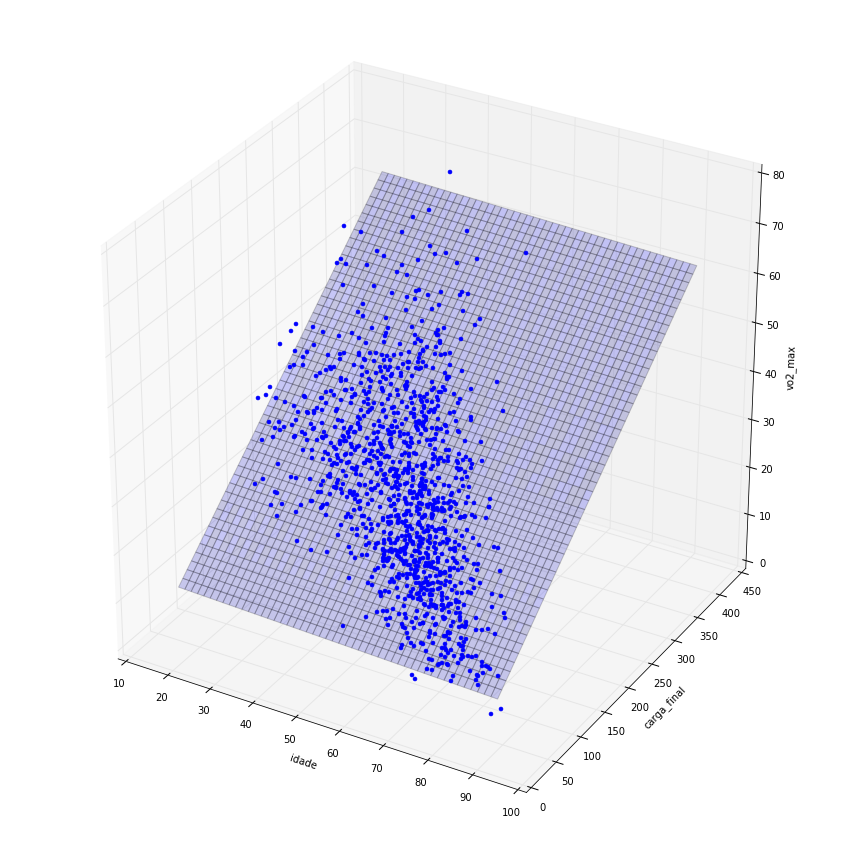

In [12]:
from scipy.stats import multivariate_normal

# degree = 1 cov = [[1,0][0,1]]
cov = [[1,0],[0,1]]

# - np.sum(stats.norm.logpdf(y,loc=p1(xs),scale=SIGMA))

# mesh
domain_x = np.linspace(x.min(),x.max(),50)
domain_y = np.linspace(y.min(),y.max(),50)

X,Y = np.meshgrid(domain_x, domain_y)
A = np.c_[x, y, np.ones(len(x))]
# C are the coefficients
C,_,_,_ = lstsq(A, z)
    
# z = ax + by +c is the function for the surface
Z = C[0]*X + C[1]*Y + C[2]

fig = plt.figure(figsize=(15,15))

ax = fig.gca(projection='3d')
ax.plot(x,y,z,'.',ms=8.0, label="Data")
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,alpha=0.2)
ax.set_xlabel("idade")
ax.set_ylabel("carga_final")
ax.set_zlabel("vo2_max")

Now let's calculate the NLL for a couple of combinations of the value of the covariance matrix of the multivariate gaussian that represents the error.

We will calculate the likelihood of the data points having been generated by the given surface while allowing for an error that may fall within a (bivariate) gaussian distribution with center in the estimated surface and covariance matrix given the `cov` parameter.

> When a **single scalar** `s` is given as the covariance value for function `multivariate_normal.logpdf()`, python converts it to an identity matrix where every non-zero element equals `s`

In [13]:
# from the previous step, we have

xs = np.linspace(0, x.max(), len(x), endpoint=False)
ys = np.linspace(0, y.max(), len(y), endpoint=False)
zs = z.values # original z-values for the data

X,Y = np.meshgrid(xs, ys)
A = np.c_[xs, ys, np.ones(len(xs))]
# C are the coefficients
C,_,_,_ = lstsq(A, zs)
    
# z = ax + by +c is the function for the surface fitted
Z_HAT = C[0]*X + C[1]*Y + C[2]

estimate_z = np.vectorize(lambda x,y: C[0]*x + C[1]*y + C[2])


# degree 1, cov=1

# a scalar value represents an identity matrix with entries equal to that number
COV = 1

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))

# degree 1, cov=10

# a scalar value represents an identity matrix with entries equal to that number
COV = 10

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))


# degree 1, cov=100

# a scalar value represents an identity matrix with entries equal to that number
COV = 100

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))


# degree 1, cov=1000

# a scalar value represents an identity matrix with entries equal to that number
COV = 1000

nll_1 = -np.sum(multivariate_normal.logpdf(zs,mean=estimate_z(xs,ys), cov=COV))

print("Degree 1: \n w     = {0} \n COVARIANCE(SCALAR) = {1}\n NLL   = {2:.2f} \n".format(
        C,
        COV,
        nll_1))


Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 1
 NLL   = 43211.64 

Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 10
 NLL   = 6631.86 

Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 100
 NLL   = 4184.12 

Degree 1: 
 w     = [ -9.97091909e-03  -4.73344731e-02   4.00524463e+01] 
 COVARIANCE(SCALAR) = 1000
 NLL   = 5149.59 



# QUESTION 3

In this question, we will fit a **2-degree surface** to the data (using `idade` and `carga_final` as **x** and **y**, respectively, and `vo2_max` as the **z** variable), using a model composed of a mixture of Gaussians to approximate the error.

> For more information, please see section **11.4** (particularly subsection 11.4.2) on the book *Machine Learning - A Probabilistic Perspective* by Kevin P. Murphy

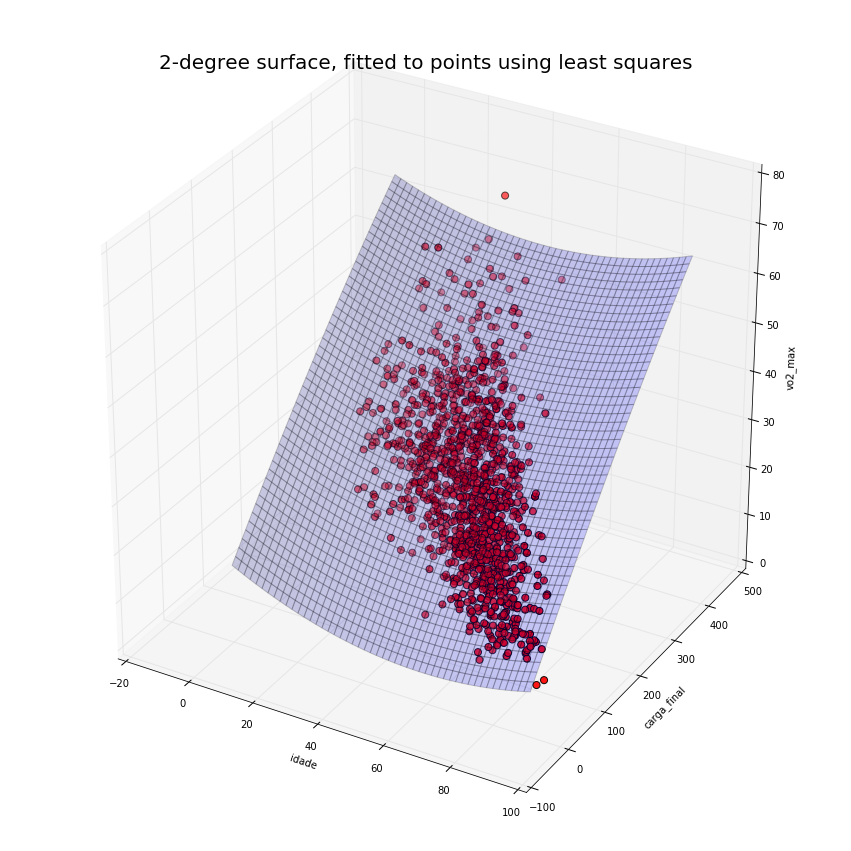

In [14]:
from ipywidgets import IntSlider,interact

xs = df["idade"].values
ys = df["carga_final"].values
zs = df["vo2_max"].values

# these will be the domain for the x and y axes, where I will plot the surface
domain_x = np.linspace(0,xs.max(),50)
domain_y = np.linspace(0,ys.max(),50)

X,Y = np.meshgrid(domain_x,domain_y)
  
XX = X.flatten()
YY = Y.flatten()   

data = df[["idade","carga_final","vo2_max"]].values

A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
C,_,_,_ = sp.linalg.lstsq(A, data[:,2])
    
# returns the estimated z value on a surface of degree 2
def get_z_hat(x,y):
    W = [1,x,y,x*y,x**2,y**2]
    return(np.dot(C,W))

# vectorized version of function above
v_get_z_hat = np.vectorize(get_z_hat)    

Z_HAT = v_get_z_hat(XX,YY).reshape(X.shape)

azim_slider = IntSlider(value=-60, min=-90, max=-1,step=5,description='Set azimuth')
elev_slider = IntSlider(value=30, min=0, max=60,step=5,description='Set elevation')
@interact(azim=azim_slider,elev=elev_slider)
def plot(azim,elev):
    fig = plt.figure(figsize=(15,15))
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z_HAT, rstride=1, cstride=1, alpha=0.2)
    ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
    ax.set_xlabel("idade")
    ax.set_ylabel("carga_final")
    ax.set_zlabel("vo2_max")
    plt.title("2-degree surface, fitted to points using least squares",{'fontsize':20})
    ax.view_init(azim=azim,elev=elev)  
    plt.show()    

Now let's try and calculate the NLL (legative log likelihood) of our model, which amounts to using the estimated z-values (z hat) on the surface above for each (x,y) pair as the mean for a mixture of gaussians. Then we verify the probability that the original z values belong in these ranges.

The formula for the negative log likelihood in a mixture of K gaussians is as follows:

$$NLL(\theta) = \Pr(X\vert\pi,\mu,\Sigma) = - \sum_{n=1}^{N} ln\bigg\{\sum_{k=1}^{K}\pi_kN(x_n\vert\mu_k,\Sigma_k)\bigg\}$$

> We'll use K=2 for this example, with both gaussians having the same covariance and the same mixing weights ($\pi_k$)

In [15]:
# CASE 1: Covariance is the identity matrix

# using the same weight for both gaussian components
pi_ks = [0.5,0.5]
cov =  1 # an identity matrix

# our Z_HAT was calculated over the mesh grid used for the plot
# now we need to use the actual domain for x and y so that we can compare
# the actual zs with our predictions, z_hats
z_hats = v_get_z_hat(xs,ys)

nll_1 = -2*np.sum( np.dot(pi_ks,multivariate_normal.logpdf(zs,mean=z_hats,cov=cov) ))

print("""
    Using the identity matrix scaled by {0} as covariance matrix, k=2 and 0.5 as mixing weights for 
    both components, we got {1:.2f} as NLL 
    """.format(cov,nll_1))


# CASE 2: Covariance is the identity matrix scaled by 10

# using the same weight for both gaussian components
pi_ks = [0.5,0.5]

cov =  10 # an identity matrix

# our Z_HAT was calculated over the mesh grid used for the plot
# now we need to use the actual domain for x and y so that we can compare
# the actual zs with our predictions, z_hats
z_hats = v_get_z_hat(xs,ys)

nll_10 = -2*np.sum( np.dot(pi_ks,multivariate_normal.logpdf(zs,mean=z_hats,cov=cov) ))

print("""
    Using the identity matrix scaled by {0} as covariance matrix, k=2 and 0.5 as mixing weights for 
    both components, we got {1:.2f} as NLL 
    """.format(cov,nll_10))

# CASE 3: Covariance is the identity matrix scaled by 100

# using the same weight for both gaussian components
pi_ks = [0.5,0.5]

cov =  100 # an identity matrix

# our Z_HAT was calculated over the mesh grid used for the plot
# now we need to use the actual domain for x and y so that we can compare
# the actual zs with our predictions, z_hats
z_hats = v_get_z_hat(xs,ys)

nll_100 = -2*np.sum( np.dot(pi_ks,multivariate_normal.logpdf(zs,mean=z_hats,cov=cov) ))

print("""
    Using the identity matrix scaled by {0} as covariance matrix, k=2 and 0.5 as mixing weights for 
    both components, we got {1:.2f} as NLL 
    """.format(cov,nll_100))



    Using the identity matrix scaled by 1 as covariance matrix, k=2 and 0.5 as mixing weights for 
    both components, we got 31025.27 as NLL 
    

    Using the identity matrix scaled by 10 as covariance matrix, k=2 and 0.5 as mixing weights for 
    both components, we got 7723.92 as NLL 
    

    Using the identity matrix scaled by 100 as covariance matrix, k=2 and 0.5 as mixing weights for 
    both components, we got 7814.27 as NLL 
    


Now we can generate samples from the model and use a QQ-plot to check how close they are to the actual data

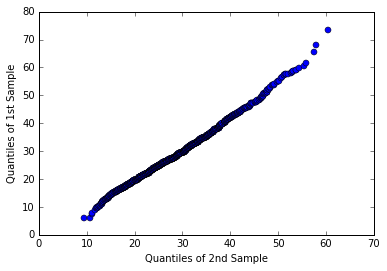

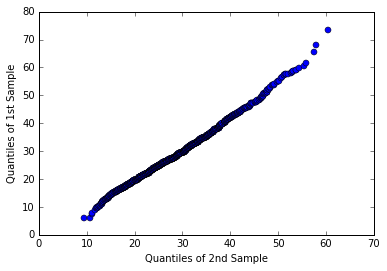

In [16]:
from statsmodels.graphics.gofplots import qqplot_2samples

actual_data = zs

# estimates amount to a mixture of gaussians with mean on the estimated point
# multiplied by two to account for both components
generated_data = z_hats + 2 * multivariate_normal.rvs()
qqplot_2samples(actual_data,generated_data)

# QUESTION 4

# QUESTION 5

# QUESTION 6

We'll try to cluster the data using K-means clustering

> Note that K-means is just a special case of GMM-based EM; a case where all densities of the gaussian distributions are concentrated in a single point and points belong to a single cluster (and all gaussian distributions have so called *spherical* covariances). Therefore we can also use GMMs to calculate the clusters.

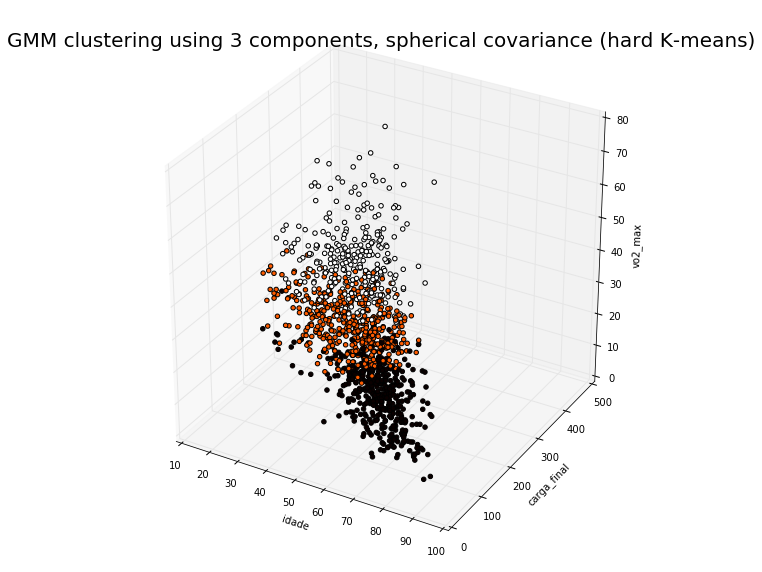

In [17]:
from sklearn.mixture import GMM
from ipywidgets import IntSlider,interact

data = df
# 3 COMPONENTS

data = df[["idade","carga_final","vo2_max"]].values
# setting the number of components (gaussians in the mixture)
gmm = GMM(n_components=3,covariance_type='spherical')

# the EM algorithm proper is executed here
gmm.fit(X=data)

# Here we obtain the predictions for each row in the dataset
# each predicition is a number, ranging from 0 to n_components-1,
# and represents the component (gaussian) that row most likely
# belongs in.
predictions = gmm.predict(data)

# add the newly-discovered component to the dataset
df1 = df[["idade","carga_final","vo2_max"]]
df1.loc[:,"component"] = predictions
xs = df1["idade"].values
ys = df1["carga_final"].values
zs = df1["vo2_max"].values
targets = df1["component"].values

plt.clf()
# azimuth slider
@interact(azim=IntSlider(value=-60, min=-90, max=-5,step=5,description='Set azimuth'))
def plot_values(azim):
    fig = plt.figure(figsize=(10,10))
    # ax = fig.add_subplot(1,3,1,projection='3d')
    ax = fig.gca(projection='3d')
    ax.scatter(xs,ys,zs,c=targets,cmap=plt.cm.hot, label="Data",alpha=1)
    ax.set_xlabel("idade")
    ax.set_ylabel("carga_final")
    ax.set_zlabel("vo2_max")
    plt.title("GMM clustering using 3 components, spherical covariance (hard K-means)",{'fontsize':20})
    ax.view_init(azim=azim)     

In addition, we'll also calculate, for each of the 3 components (0 - 2), the percentage of its points that fall into each of the following age brackets:
 
 - bucket 1: 0 - 29
 - bucket 2: 30 - 49
 - bucket 3: 50 - 59
 - bucket 4: 60 - 69
 - bucket 5: 70 - 79
 - bucket 6: 80 - 100

In [18]:
# component 0

totalcomponent0 = len(df1[df1["component"] == 0 ])

bucket1 = df1[(df1["component"] == 0) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 0) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 0) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 0) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 0) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 0) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 0\n")
print("The first component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 80-100 age bracket.\n\n".format(len(bucket6)*100/totalcomponent0))

# component 1

totalcomponent1 = len(df1[df1["component"] == 1 ])

bucket1 = df1[(df1["component"] == 1) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 1) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 1) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 1) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 1) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 1) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 1\n")
print("The second component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 80-100 age bracket.\n\n".format(len(bucket6)*100/totalcomponent1))


# component 2

totalcomponent2 = len(df1[df1["component"] == 2 ])

bucket1 = df1[(df1["component"] == 2) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 2) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 2) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 2) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 2) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 2) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 2\n")
print("The third component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 80-100 age bracket.".format(len(bucket6)*100/totalcomponent2))



COMPONENT 0

The first component has 0.46 percent of its points in the 0-29 age bracket.
The first component has 4.14 percent of its points in the 30-49 age bracket.
The first component has 18.16 percent of its points in the 50-59 age bracket.
The first component has 41.15 percent of its points in the 60-69 age bracket.
The first component has 28.51 percent of its points in the 70-79 age bracket.
The first component has 7.59 percent of its points in the 80-100 age bracket.


COMPONENT 1

The second component has 6.41 percent of its points in the 0-29 age bracket.
The second component has 42.11 percent of its points in the 30-49 age bracket.
The second component has 35.24 percent of its points in the 50-59 age bracket.
The second component has 15.79 percent of its points in the 60-69 age bracket.
The second component has 0.46 percent of its points in the 70-79 age bracket.
The second component has 0.00 percent of its points in the 80-100 age bracket.


COMPONENT 2

The third component h

And 4 components:

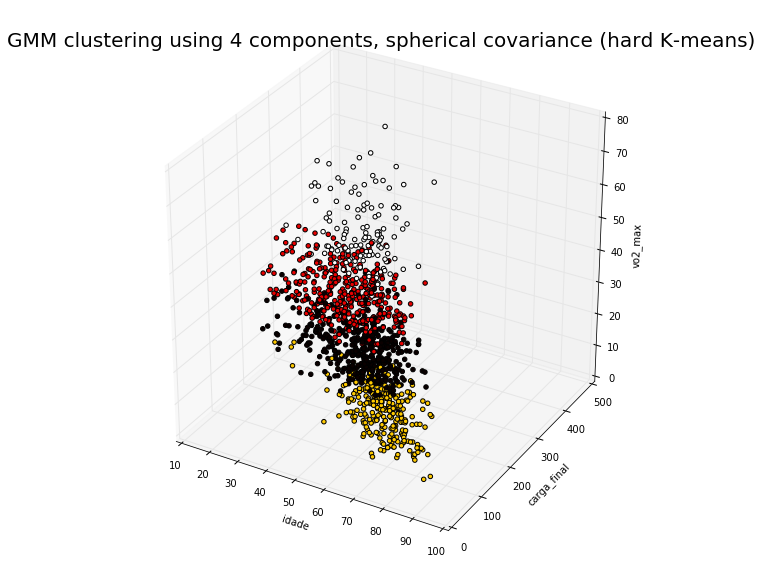

In [19]:
# 4 COMPONENTS

# setting the number of components (gaussians in the mixture)
gmm = GMM(n_components=4,covariance_type='spherical')

# the EM algorithm proper is executed here
gmm.fit(X=data)

# Here we obtain the predictions for each row in the dataset
# each predicition is a number, ranging from 0 to n_components-1,
# and represents the component (gaussian) that row most likely
# belongs in.
predictions = gmm.predict(data)

# add the newly-discovered component to the dataset
df1 = df[["idade","carga_final","vo2_max"]]
df1.loc[:,"component"] = predictions
xs = df1["idade"].values
ys = df1["carga_final"].values
zs = df1["vo2_max"].values
targets = df1["component"].values

plt.clf()
# azimuth slider
@interact(azim=IntSlider(value=-60, min=-90, max=-5,step=2,description='Set azimuth'))
def plot_values(azim):
    fig = plt.figure(figsize=(10,10))
    # ax = fig.add_subplot(1,3,1,projection='3d')
    ax = fig.gca(projection='3d')
    ax.scatter(xs,ys,zs,c=targets,cmap=plt.cm.hot, label="Data",alpha=1)
    ax.set_xlabel("idade")
    ax.set_ylabel("carga_final")
    ax.set_zlabel("vo2_max")
    plt.title("GMM clustering using 4 components, spherical covariance (hard K-means)",{'fontsize':20})
    ax.view_init(azim=azim)

Similarly to what's been done for the case where K=3, let's find out what proportion of the data for each component falls into each age bracket.

In [20]:
# component 0

totalcomponent0 = len(df1[df1["component"] == 0 ])

bucket1 = df1[(df1["component"] == 0) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 0) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 0) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 0) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 0) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 0) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 0\n")
print("The first component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent0))
print("The first component has {0:.2f} percent of its points in the 80-100 age bracket.\n\n".format(len(bucket6)*100/totalcomponent0))

# component 1

totalcomponent1 = len(df1[df1["component"] == 1 ])

bucket1 = df1[(df1["component"] == 1) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 1) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 1) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 1) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 1) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 1) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 1\n")
print("The second component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent1))
print("The second component has {0:.2f} percent of its points in the 80-100 age bracket.\n\n".format(len(bucket6)*100/totalcomponent1))


# component 2

totalcomponent2 = len(df1[df1["component"] == 2 ])

bucket1 = df1[(df1["component"] == 2) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 2) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 2) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 2) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 2) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 2) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 2\n")
print("The third component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent2))
print("The third component has {0:.2f} percent of its points in the 80-100 age bracket.\n\n".format(len(bucket6)*100/totalcomponent2))


# component 3

totalcomponent3 = len(df1[df1["component"] == 3 ])

bucket1 = df1[(df1["component"] == 3) & (df["idade"] <= 29)]
bucket2 = df1[(df1["component"] == 3) & ((df["idade"] >= 30) & (df["idade"] <= 49))]
bucket3 = df1[(df1["component"] == 3) & ((df["idade"] >= 50) & (df["idade"] <= 59))]
bucket4 = df1[(df1["component"] == 3) & ((df["idade"] >= 60) & (df["idade"] <= 69))]
bucket5 = df1[(df1["component"] == 3) & ((df["idade"] >= 70) & (df["idade"] <= 79))]
bucket6 = df1[(df1["component"] == 3) & ((df["idade"] >= 80) & (df["idade"] <= 100))]
print("COMPONENT 3\n")
print("The third component has {0:.2f} percent of its points in the 0-29 age bracket.".format(len(bucket1)*100/totalcomponent3))
print("The third component has {0:.2f} percent of its points in the 30-49 age bracket.".format(len(bucket2)*100/totalcomponent3))
print("The third component has {0:.2f} percent of its points in the 50-59 age bracket.".format(len(bucket3)*100/totalcomponent3))
print("The third component has {0:.2f} percent of its points in the 60-69 age bracket.".format(len(bucket4)*100/totalcomponent3))
print("The third component has {0:.2f} percent of its points in the 70-79 age bracket.".format(len(bucket5)*100/totalcomponent3))
print("The third component has {0:.2f} percent of its points in the 80-100 age bracket.".format(len(bucket6)*100/totalcomponent3))

COMPONENT 0

The first component has 3.38 percent of its points in the 0-29 age bracket.
The first component has 23.43 percent of its points in the 30-49 age bracket.
The first component has 37.68 percent of its points in the 50-59 age bracket.
The first component has 30.19 percent of its points in the 60-69 age bracket.
The first component has 5.31 percent of its points in the 70-79 age bracket.
The first component has 0.00 percent of its points in the 80-100 age bracket.


COMPONENT 1

The second component has 10.89 percent of its points in the 0-29 age bracket.
The second component has 57.88 percent of its points in the 30-49 age bracket.
The second component has 23.78 percent of its points in the 50-59 age bracket.
The second component has 7.45 percent of its points in the 60-69 age bracket.
The second component has 0.00 percent of its points in the 70-79 age bracket.
The second component has 0.00 percent of its points in the 80-100 age bracket.


COMPONENT 2

The third component h